In [1]:
from spacerocks import SpaceRock, Units, Orbfit
import numpy as np

from astropy import units as u

import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
units = Units()
units.angle = 'deg'

rocks = SpaceRock(a=30, 
                  e=0.2, 
                  inc=10, 
                  node=18, 
                  arg=23, 
                  M=0.34,
                  epoch=2459305.5, 
                  frame='barycentric',
                  units=units)

p, planets, sim = rocks.propagate(epochs=np.linspace(2459305.5, 2459305.5 + (1/12) * 365.25, 40), model=2)
obs = p.observe(obscode='807')

In [350]:
units = Units()
units.ra = u.deg
units.dec = u.deg

o = Orbfit(ra=obs.ra.deg, dec=obs.dec.deg, epoch=obs.epoch.jd, obscode=807, units=units)

In [351]:
elements, errs = o.get_elements()

In [352]:
elements, errs

({'a': 29.936005170952754,
  'e': 0.19839325463879146,
  'i': 10.004475178701796,
  'lan': 18.01117152416798,
  'aop': 22.73491227578208,
  'top': 2459221.1508694645},
 {'a': 2.005511623853656,
  'e': 0.05016958005060814,
  'i': 0.14394564345785624,
  'lan': 0.36158089091673407,
  'aop': 14.601155837832255,
  'top': 1554.5475594739198})

In [353]:
rock = o.spacerock

In [354]:
pos_pred = o.predict_pos(['August 20, 2021', '2021/08/25'])

---

In [355]:
clones = o.clone(1000)

In [356]:
x, y, z = clones.orbits()
rx, ry, rz = rocks.orbits()

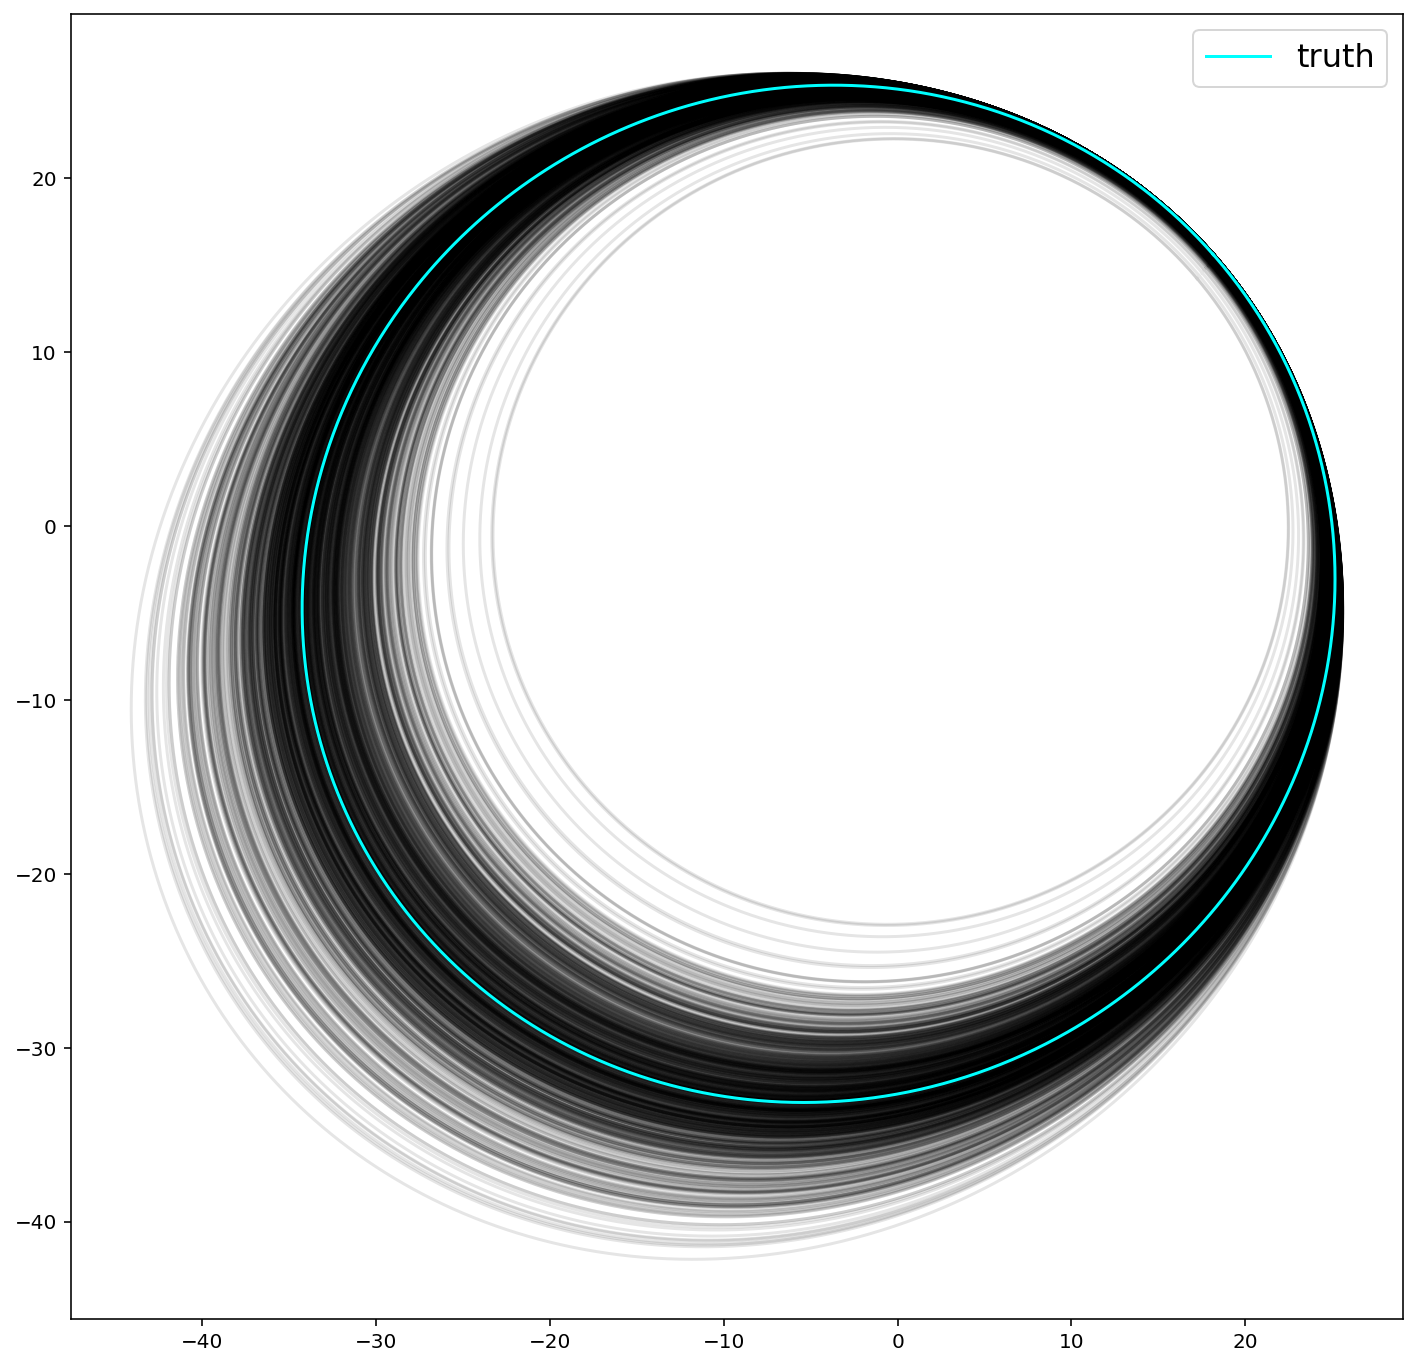

In [357]:
fig, ax = plt.subplots(figsize=(12, 12))
for idx in range(len(x)):
    ax.plot(x[idx], y[idx], color='black', alpha=0.1)
    
ax.plot(rx[0].value, ry[0].value, color='cyan', zorder=4, label='truth');
ax.set_aspect('equal');
ax.legend(fontsize=16);